In [5]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using LinearAlgebra, Plots
using ProgressMeter
import ForwardDiff as FD
import Convex as cvx
import ECOS

include(joinpath(@__DIR__,"utils","fmincon.jl"))

  Activating environment at `c:\CMU_Spring\OptimalSailboat\Project.toml`


fmincon (generic function with 1 method)

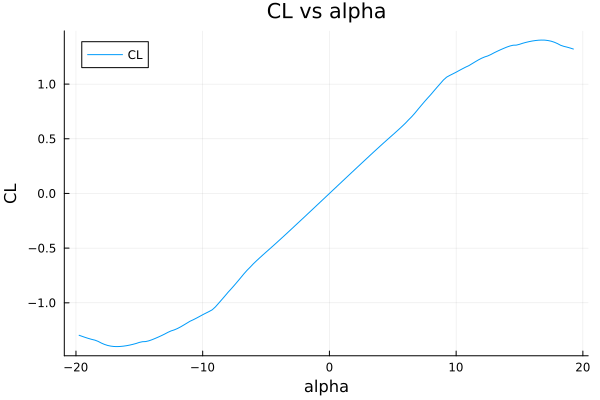

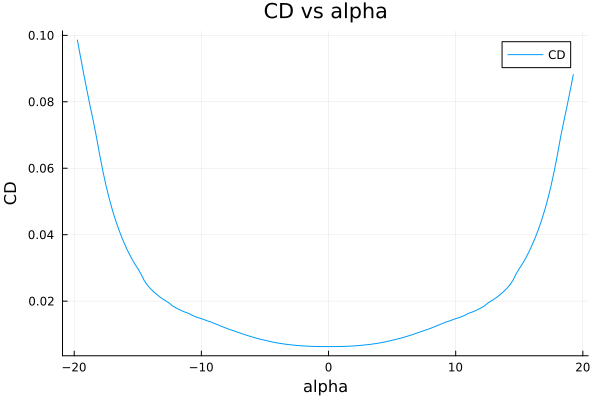

alpha = [-19.75, -19.5, -19.25, -19.0, -18.75, -18.5, -18.25, -18.0, -17.75, -17.5, -17.25, -17.0, -16.75, -16.5, -16.25, -16.0, -15.75, -15.5, -15.25, -15.0, -14.75, -14.5, -14.25, -14.0, -13.75, -13.5, -13.25, -13.0, -12.75, -12.5, -12.25, -12.0, -11.75, -11.5, -11.25, -11.0, -10.75, -10.5, -10.25, -10.0, -9.75, -9.5, -9.25, -9.0, -8.75, -8.5, -8.25, -8.0, -7.75, -7.5, -7.25, -7.0, -6.75, -6.5, -6.25, -6.0, -5.75, -5.5, -5.25, -5.0, -4.75, -4.5, -4.25, -4.0, -3.75, -3.5, -3.25, -3.0, -2.75, -2.5, -2.25, -2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 14.25, 14.5, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 1

In [9]:
# Using the NACA0015 airfoil data from the file NACA0015.dat
# You can find the calculator at : http://airfoiltools.com/polar/details?polar=xf-naca0015-il-1000000


function CL_CD_from_dat(datfile)
    """
    Reads a .dat file and returns the alpha, CL, and CD data.
    """

    lines = readlines(datfile)

    alpha = Float64[]
    CL = Float64[]
    CD = Float64[]

    for line in lines[8:end]  
        
        columns = split(line)

        push!(alpha, parse(Float64, columns[1]))
        push!(CL, parse(Float64, columns[2]))
        push!(CD, parse(Float64, columns[3]))
    end

    return alpha, CL, CD
end

# CL and CD data from the NACA0015 airfoil
# This was the keel model used in the paper we are referencing
dat = "NACA0015.dat"
alpha, CL, CD = CL_CD_from_dat(dat)

println("alpha = ", alpha)
println("CL = ", CL)
println("CD = ", CD)

# Plot the data
p1 = plot(alpha, CL, xlabel="alpha", ylabel="CL", title="CL vs alpha")
p2 = plot(alpha, CD, xlabel="alpha", ylabel="CD", title="CD vs alpha")

display(p1)
display(p2)


# CLD 


